# SVD - Singular Value Decomposition

Reference: 

   *  "Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control"  by Brunton and Kutz:
   http://www.databookuw.com/
   * MIT 18.065 Matrix Methods in Data Analysis, Signal Processing, and Machine Learning
   https://www.youtube.com/watch?v=rYz83XPxiZo&list=PLUl4u3cNGP63oMNUHXqIUcrkS2PivhN3k&index=8&t=904s

**Intro:**
* Main Aim = Dimension Reduction
    * The SVD provides a systematic way to determine a low-dimensional approximation to high-dimensional data in terms of dominant patterns. 
* Advantage = The SVD is guaranteed to exist for any matrix, unlike the eigendecomposition (only for Square Matrix).
* Concept:
    * $M=U*  \Sigma *V^{T}$ 
    * In aother word, $M * V=U*  \Sigma$ --- (M is the transformation bring one ortho matrix (V) to another ortho matrix (U))
* Applications
  * Dimension Reduction (Data Compression)
  * Compute the pseudo-inverse of non-square matrices
  * Providing solutions to underdetermined or overdetermined matrix equations, Ax = b.
  * De-noise data sets.

![link text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/440px-Singular_value_decomposition_visualisation.svg.png)

# The Intuition behind SVD

***- Definition: SVD is a Decomposition of Any Matrix M***


**1. The Geometric Intrepretation (Decomposition of Linear Transformation (M))**
  * Linear Transformation M can be decomposed into 3 parts
    * **V**  = Orthonormal Matrix (Unitary Matrix) --- **Rotation** 
    * **$\Sigma$** = Diagonal Matrix --- **Scale**
    * **U** = Orthonormal Matrix (Unitary Matrix) --- **Rotation** 

![link text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/440px-Singular-Value-Decomposition.svg.png)

**2. The Dominant Correlations Intrepretation**
[Youtube Lecture : Singular Value Decomposition (SVD): Dominant Correlations](https://www.youtube.com/watch?v=WmDnaoY2Ivs&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=4)

  * Any Matrix X can be decomposed into 3 parts
    * **V** = Orthonormal Matrix --- **Eigen Vectors** of $X^{T} * X$ (Column-Wise Correlation Matrix)
    * **$\Sigma$** = Diagonal Matrix --- **Eigen Values** of $X^{T} * X$ (Correlation Matrix)
    * **U** = Orthonormal Matrix --- **Eigen Vectors** of $X * X^{T}$ (Row-Wise Correlation Matrix)
      

![link text](https://i.ytimg.com/vi/WmDnaoY2Ivs/maxresdefault.jpg)

# Low Rank Approximation of SVD (Rank r Approximation)

* Aim: Only keep the minimal useful information in U and V
    * bcz, $M * V=U*  \Sigma$
    * There Null Space of M (V for $M * V=0$),which Sigma = 0, are are the informaiton that we dont need
    * If the $\Sigma$ (m * n) only have **r** Non-Zero Values, we only keep those first r values, so does it for 
        * U = first r columns
        * V =  first r rows
    * This is called the **Rank r** Approximation of SVD, it Significatnly save the computation load


![link text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Reduced_Singular_Value_Decompositions.svg/220px-Reduced_Singular_Value_Decompositions.svg.png)

# Application 1 - Image Compression

Reference: https://www.youtube.com/watch?v=H7qMMudo3e8&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=6



In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os

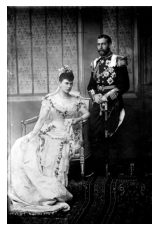

In [2]:
# read the image
X=imread('../input/low-resolution-photographs/dataset/img102.jpg')

# plot the image
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()


In [3]:
# The NumPy SVD Package: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
# SVD for image X
U, S, VT = np.linalg.svd(X,full_matrices=False) # The 'Economy' SVD
S = np.diag(S)

In [4]:
# look into the dimension of the X, U, S, VT
print('image X shape = ',X.shape)
print('U shape = ',U.shape)
print('Sigma shape = ',S.shape)
print('VT shape = ',VT.shape)

image X shape =  (1536, 1024)
U shape =  (1536, 1024)
Sigma shape =  (1024, 1024)
VT shape =  (1024, 1024)


In [5]:
# function to plot the compressed image, r = rank (max of r = 1024)
def plt_compress_img(r):
  Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title(f'r = {r}')
  plt.show()


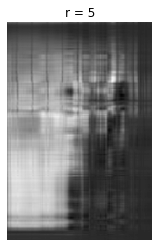

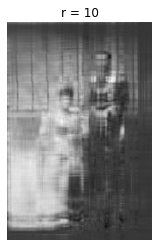

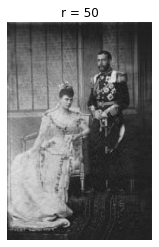

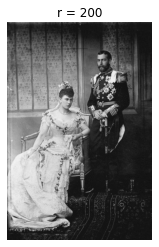

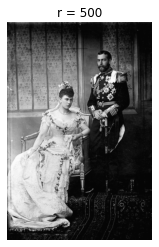

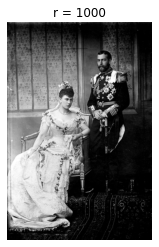

In [6]:
# define a list store different r value
r_range= [5,10,50,200,500,1000]

# plot the image for each r
for r in r_range:
  plt_compress_img(r=r)


## We can see that for r = 50 (max r = 1024), we can have relatively good quality image

## How much r should we choose? --- The Cumulative Singular Value over Sum Plot (Matrix S)

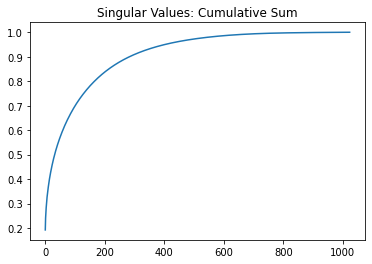

In [7]:
# plot the cumulative singular value over the sum
## S = singular value matrix

plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

Based on the Graph, probably the r = 400 is a good choice 